# Import libraries and load data

In [2]:
import re
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Silence warnings
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [4]:
def read_txt(name):
    
    f = open("txt/" + name + ".txt", "r")
    text = f.read()
    f.close()
    
    return text

In [516]:
odyssey_Homer_lem = read_txt('odyssey_Homer_lem')
iliad_Homer_lem = read_txt('iliad_Homer_lem')
aristides_lem = read_txt('aristides_lem')
hesiode_lem = read_txt('hesiode_lem')

In [589]:
Homer_raw = read_txt('odyssey_Homer') + read_txt('iliad_Homer')
Others_raw = read_txt('aristides') + read_txt('hesiode') \
    + read_txt('lycurgus') + read_txt('aristotle') \
    + read_txt('antiphon') + read_txt('thucydides')

# Compute words MSE

In [305]:
def words_distribution_weighted_MSE_MAE(words, count, text, tokens = 500):
        
    w_ = re.split('[\s\.,·:;\'—«»*]', text)
    words_list = []
    
    for w in w_:
        if w != '':
            words_list.append(w)
    
    n_sample = len(words_list) // tokens
    
    spans = []
    
    for word in words :
        
        span = []
        
        for i in range(len(words_list)):
            if word == words_list[i]:
                span.append(i) 
        spans.append(np.asarray(span))        
    
    MSE, MAE, counts = [], [], []
    
    for n in range(n_sample):
        
        counts_ = []
        
        for i in range(len(spans)):
            span_ = spans[i][spans[i] >= n]
            span_ = span_[span_ < n+tokens]
            length = len(span_)
            MSE.append(np.square(length - count[i]/n_sample))
            MAE.append(np.abs(length - count[i]/n_sample))
            counts_.append(length)
            
        counts.append(counts_)
        
        
    MSE, MAE = np.asarray(MSE).T, np.asarray(MAE).T
    counts = np.asarray(counts).T
    
    weighted_MSE, weighted_MAE, std = [], [], []
    
    for i in range(len(counts)):
        std.append(np.std(counts[i]))
        weighted_MSE.append(np.mean(MSE[i]))
        weighted_MAE.append(np.mean(MAE[i]))
    
    
    return weighted_MSE, weighted_MAE, std

In [281]:
def count_words(text):
    ''' Returns the word (i.e. type) count for a given text.
    
    Input:
        text(str)
    
    Output:
        count_words(pandas DataFrame): return the count for each word
    '''
        
    words = re.split('[\s\.,·:;\'—«»*]', text)
    
    count_words = pd.Series(words).value_counts()
    
    count_words = pd.DataFrame(count_words).rename(columns = {0:'count'})
    
    length = []
    
    for word in count_words.index:
        length.append(len(word))
        
    count_words['length'] = length
    
    return count_words

In [312]:
def text_metrics(text, tokens = 200):
    
    df = count_words(text).reset_index().rename(columns = {'index': 'word'})
            
    weighted_MSE, weighted_MAE, std = words_distribution_weighted_MSE_MAE(
        df['word'].values, df['count'].values, text, tokens)
    
    df['weighted_MSE'] = weighted_MSE
    df['weighted_MAE'] = weighted_MAE
    df['std'] = std

    return df

In [417]:
df_hesiode = text_metrics(hesiode_lem)

In [418]:
df_aristide = text_metrics(aristides_lem)

In [419]:
df_Homer = text_metrics(odyssey_Homer_lem + iliad_Homer_lem)

In [420]:
df_lycurgus = text_metrics(lycurgus_lem)

In [421]:
df_aristotle = text_metrics(aristotle_lem)

In [422]:
df_antiphon = text_metrics(antiphon_lem)

In [423]:
df_thucydides = text_metrics(thucydides_lem)

In [424]:
df_written = text_metrics(hesiode_lem + aristotle_lem + thucydides_lem)

In [425]:
df_oral = text_metrics(aristides_lem + lycurgus_lem + antiphon_lem)

In [518]:
df_total = text_metrics(aristides_lem + lycurgus_lem + antiphon_lem + hesiode_lem \
                         + aristotle_lem + thucydides_lem)

In [590]:
df_Homer_raw = text_metrics(Homer_raw)

In [591]:
df_Others_raw = text_metrics(Others_raw)

In [592]:
df_Homer_raw.to_csv('metrics/df_Homer_raw.csv')
df_Others_raw.to_csv('metrics/df_Others_raw.csv')

df_hesiode.to_csv('metrics/df_hesiode_deac.csv')
df_aristide.to_csv('metrics/df_aristide_deac.csv')
df_Homer.to_csv('metrics/df_Homer_deac.csv')
df_lycurgus.to_csv('metrics/df_lycurgus_deac.csv')
df_aristotle.to_csv('metrics/df_aristotle_deac.csv')
df_antiphon.to_csv('metrics/df_antiphon_deac.csv')
df_thucydides.to_csv('metrics/df_thucydides_deac.csv')
df_written.to_csv('metrics/df_written_deac.csv')
df_oral.to_csv('metrics/df_oral_deac.csv')

In [5]:
df_hesiode = pd.read_csv('metrics/df_hesiode.csv').drop(columns = 'Unnamed: 0')
df_aristide = pd.read_csv('metrics/df_aristide.csv').drop(columns = 'Unnamed: 0')
df_Homer = pd.read_csv('metrics/df_Homer.csv').drop(columns = 'Unnamed: 0')
df_lycurgus = pd.read_csv('metrics/df_lycurgus.csv').drop(columns = 'Unnamed: 0')
df_aristotle = pd.read_csv('metrics/df_aristotle.csv').drop(columns = 'Unnamed: 0')
df_antiphon = pd.read_csv('metrics/df_antiphon.csv').drop(columns = 'Unnamed: 0')
df_thucydides = pd.read_csv('metrics/df_thucydides.csv').drop(columns = 'Unnamed: 0')
df_written = pd.read_csv('metrics/df_written.csv').drop(columns = 'Unnamed: 0')
df_oral = pd.read_csv('metrics/df_oral.csv').drop(columns = 'Unnamed: 0')

In [6]:
df_Homer.describe()

,count,length,weighted_MSE,weighted_MAE,std
count,29418.000000,29418.000000,29418.000000,29418.000000,29418.000000
mean,6.800258,8.842273,0.007876,0.011112,0.011326
std,58.608057,4.665134,0.155673,0.088048,0.075477
min,1.000000,1.000000,0.000001,0.001000,0.000000
25%,1.000000,6.000000,0.000001,0.001000,0.000000
50%,1.000000,8.000000,0.000001,0.001000,0.000000
75%,3.000000,10.000000,0.000009,0.003000,0.000000
max,4805.000000,41.000000,13.483584,3.672000,2.369936


In [474]:
df_written.describe()

,Unnamed: 0,count,length,weighted_MSE,weighted_MAE,std
count,25705.000000,25705.000000,25705.000000,25705.000000,25705.000000,25705.000000
mean,12852.000000,7.786890,8.746197,0.021712,0.013773,0.013206
std,7420.538671,111.969902,3.268059,1.184839,0.146709,0.081227
min,0.000000,1.000000,1.000000,0.000001,0.001000,0.000000
25%,6426.000000,1.000000,7.000000,0.000001,0.001000,0.000000
50%,12852.000000,1.000000,8.000000,0.000001,0.001000,0.000000
75%,19278.000000,4.000000,10.000000,0.000016,0.004000,0.000000
max,25704.000000,12268.000000,39.000000,150.503824,12.268000,2.428231


In [475]:
df_oral.describe()

,Unnamed: 0,count,length,weighted_MSE,weighted_MAE,std
count,28345.000000,28345.000000,28345.000000,28345.000000,28345.000000,28345.000000
mean,14172.000000,6.703828,10.038278,0.007226,0.010034,0.009815
std,8182.641026,83.971294,5.103707,0.132613,0.084412,0.079767
min,0.000000,1.000000,1.000000,0.000001,0.001053,0.000000
25%,7086.000000,1.000000,7.000000,0.000001,0.001053,0.000000
50%,14172.000000,1.000000,9.000000,0.000001,0.001053,0.000000
75%,21258.000000,2.000000,11.000000,0.000004,0.002105,0.000000
max,28344.000000,9836.000000,47.000000,7.681650,2.771579,3.957208


In [476]:
df_Homer.head()

,Unnamed: 0,word,count,length,weighted_MSE,weighted_MAE,std
0,0,ἅγὶ,4805,3,0.038025,0.195,1.890555
1,1,δ,3672,1,13.483584,3.672,0.000000
2,2,̔ενξλιἅἄσσαναξ,3295,14,7.317025,2.705,2.179365
3,3,δὲ,3188,2,1.411344,1.188,1.632696
4,4,δ᾽,2823,2,10.093329,3.177,2.369936


In [477]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set_style("ticks")
sns.set_context("paper", font_scale=2)                                                  

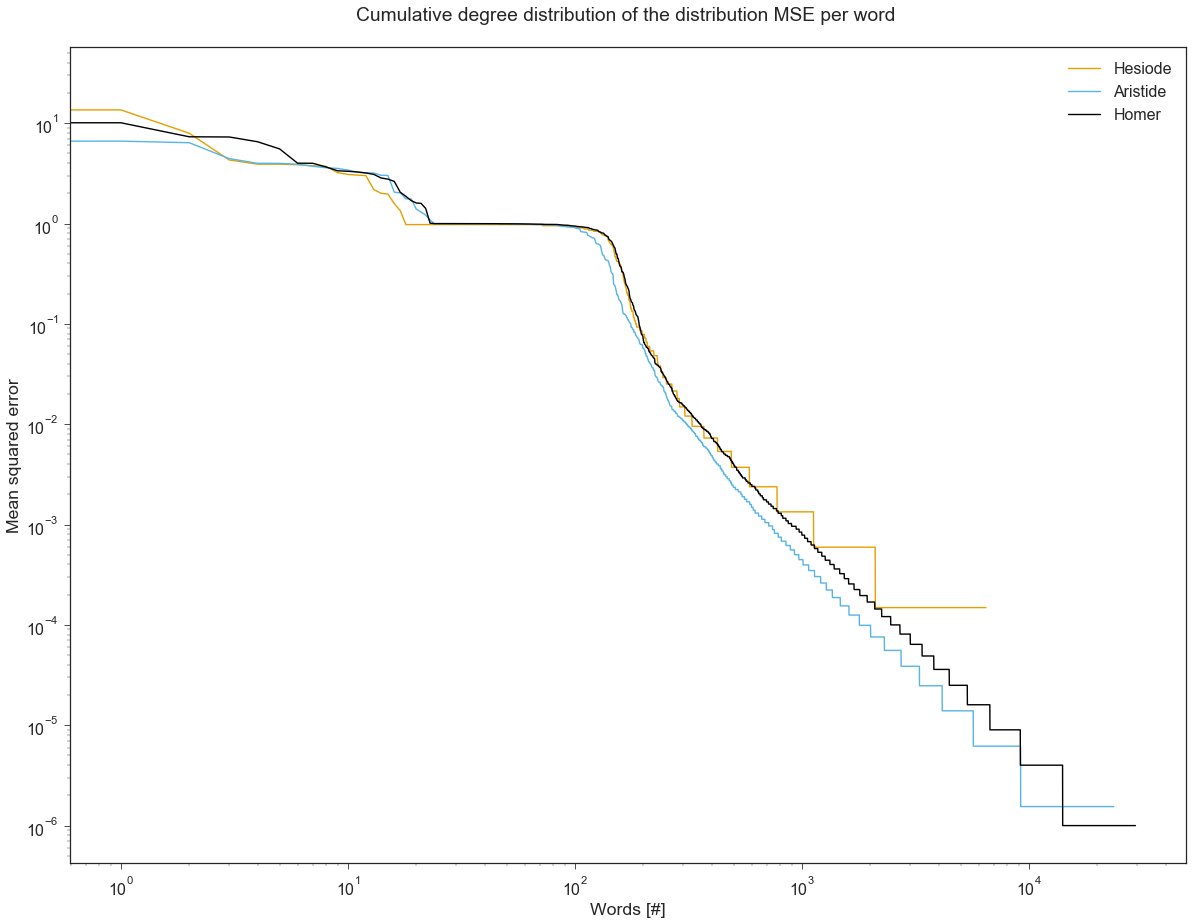

In [478]:
df_ = df_hesiode['weighted_MSE'].sort_values(ascending = False).reset_index()['weighted_MSE']
plt.loglog(df_.index, df_.values, label='Hesiode', color = '#E69F00')

plt.xlabel('Words [#]')
plt.ylabel('Mean squared error')
plt.title('Cumulative degree distribution of the distribution MSE per word \n')

df_ = df_aristide['weighted_MSE'].sort_values(ascending = False).reset_index()['weighted_MSE']
plt.loglog(df_.index, df_.values, label='Aristide', color = '#56B4E9')

df_ = df_Homer['weighted_MSE'].sort_values(ascending = False).reset_index()['weighted_MSE']
plt.loglog(df_.index, df_.values, label='Homer', color = '#000000')

plt.legend();

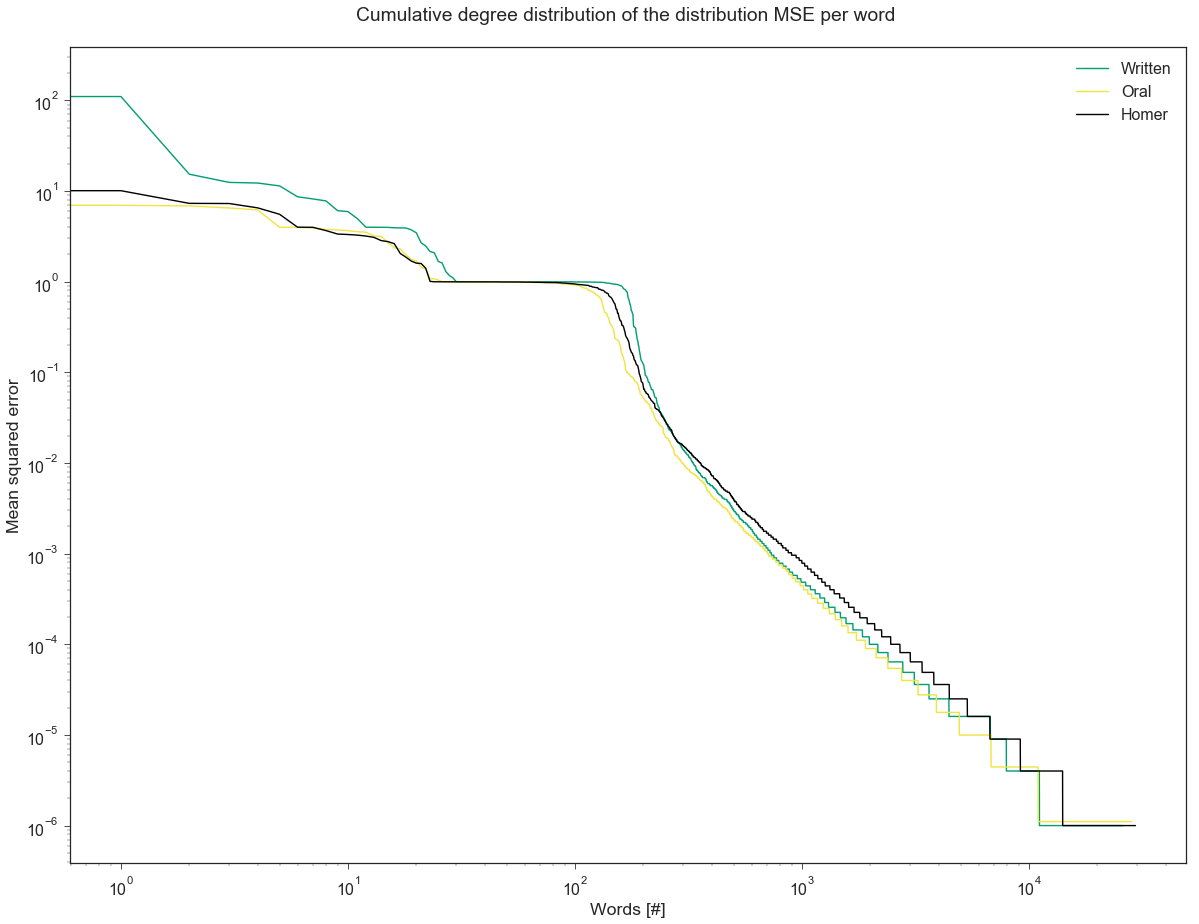

In [479]:
df_ = df_written['weighted_MSE'].sort_values(ascending = False).reset_index()['weighted_MSE']
plt.loglog(df_.index, df_.values, label='Written', color = '#009E73')

plt.xlabel('Words [#]')
plt.ylabel('Mean squared error')
plt.title('Cumulative degree distribution of the distribution MSE per word \n')

df_ = df_oral['weighted_MSE'].sort_values(ascending = False).reset_index()['weighted_MSE']
plt.loglog(df_.index, df_.values, label='Oral', color = '#F0E442')

df_ = df_Homer['weighted_MSE'].sort_values(ascending = False).reset_index()['weighted_MSE']
plt.loglog(df_.index, df_.values, label='Homer', color = '#000000')

plt.legend();

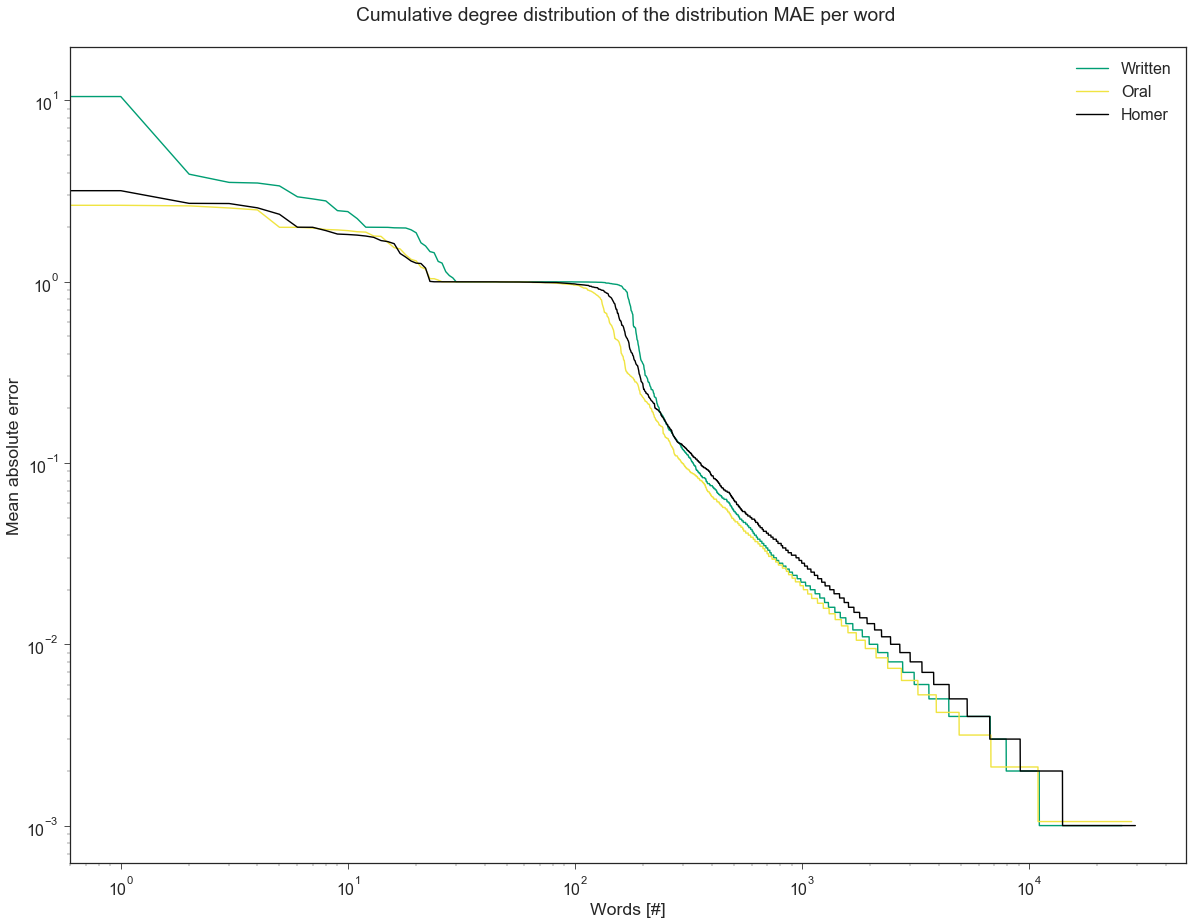

In [480]:
df_ = df_written['weighted_MAE'].sort_values(ascending = False).reset_index()['weighted_MAE']
plt.loglog(df_.index, df_.values, label='Written', color = '#009E73')

plt.xlabel('Words [#]')
plt.ylabel('Mean absolute error')
plt.title('Cumulative degree distribution of the distribution MAE per word \n')

df_ = df_oral['weighted_MAE'].sort_values(ascending = False).reset_index()['weighted_MAE']
plt.loglog(df_.index, df_.values, label='Oral', color = '#F0E442')

df_ = df_Homer['weighted_MAE'].sort_values(ascending = False).reset_index()['weighted_MAE']
plt.loglog(df_.index, df_.values, label='Homer', color = '#000000')

plt.legend();

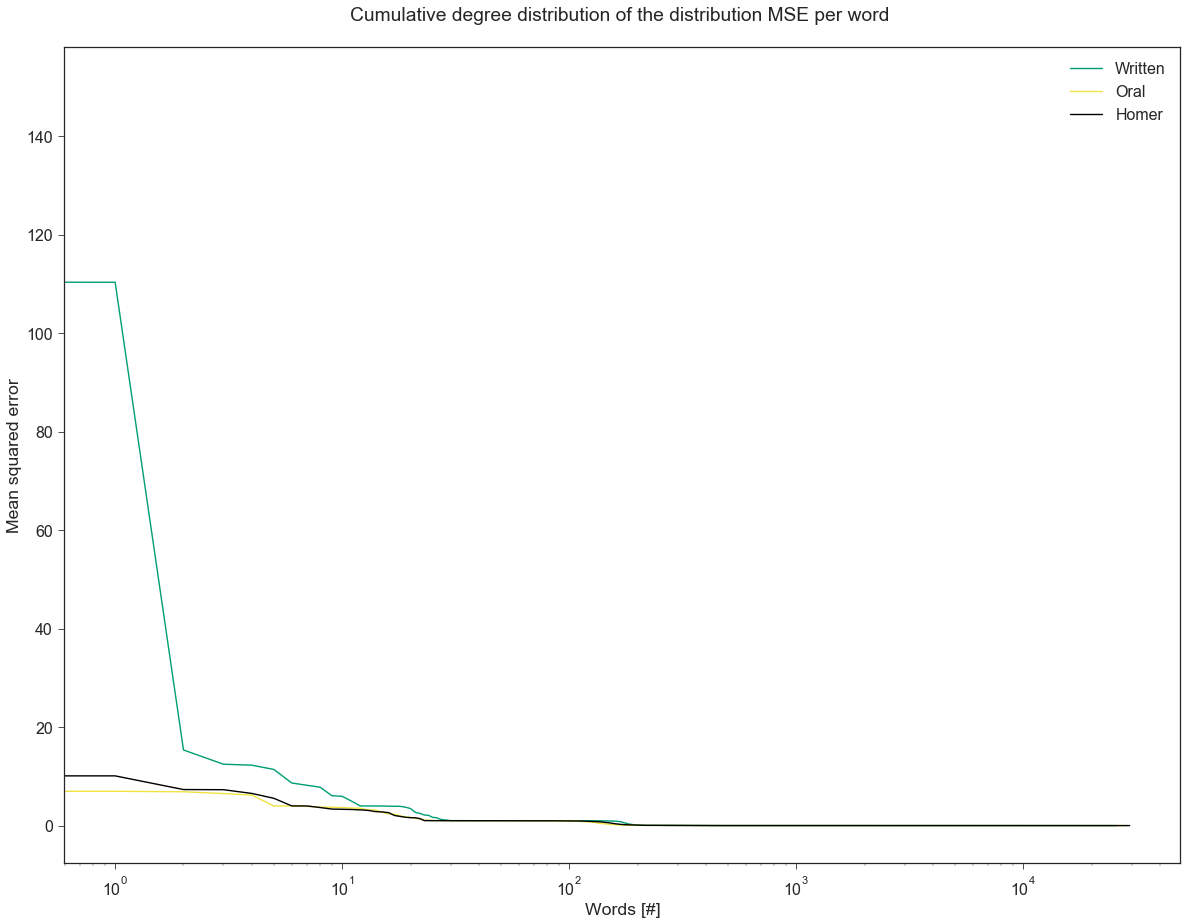

In [481]:
df_ = df_written['weighted_MSE'].sort_values(ascending = False).reset_index()['weighted_MSE']
plt.semilogx(df_.index, df_.values, label='Written', color = '#009E73')

plt.xlabel('Words [#]')
plt.ylabel('Mean squared error')
plt.title('Cumulative degree distribution of the distribution MSE per word \n')

df_ = df_oral['weighted_MSE'].sort_values(ascending = False).reset_index()['weighted_MSE']
plt.semilogx(df_.index, df_.values, label='Oral', color = '#F0E442')

df_ = df_Homer['weighted_MSE'].sort_values(ascending = False).reset_index()['weighted_MSE']
plt.semilogx(df_.index, df_.values, label='Homer', color = '#000000')

plt.legend();

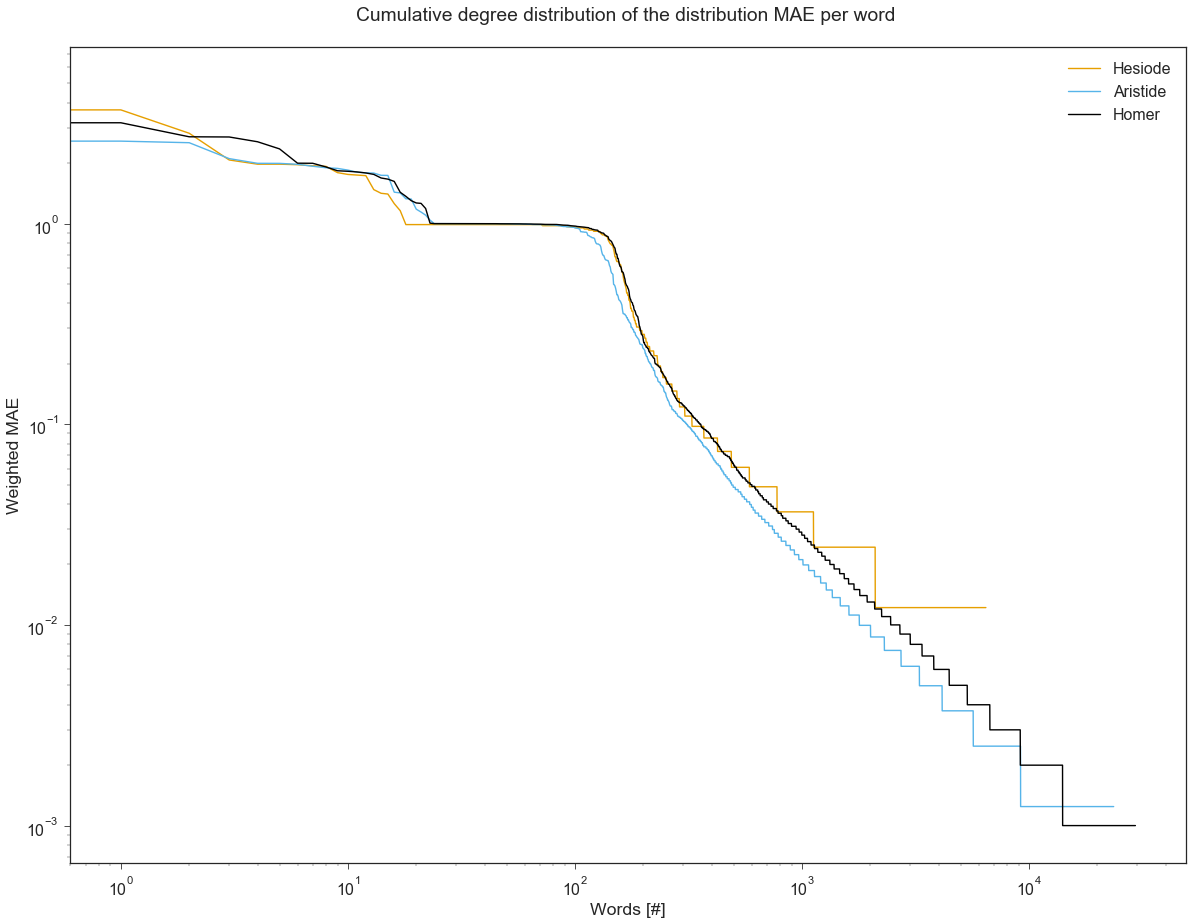

In [482]:
df_ = df_hesiode['weighted_MAE'].sort_values(ascending = False).reset_index()['weighted_MAE']
plt.loglog(df_.index, df_.values, label='Hesiode', color = '#E69F00')

plt.xlabel('Words [#]')
plt.ylabel('Weighted MAE')
plt.title('Cumulative degree distribution of the distribution MAE per word \n')

df_ = df_aristide['weighted_MAE'].sort_values(ascending = False).reset_index()['weighted_MAE']
plt.loglog(df_.index, df_.values, label='Aristide', color = '#56B4E9')

df_ = df_Homer['weighted_MAE'].sort_values(ascending = False).reset_index()['weighted_MAE']
plt.loglog(df_.index, df_.values, label='Homer', color = '#000000')

plt.legend();

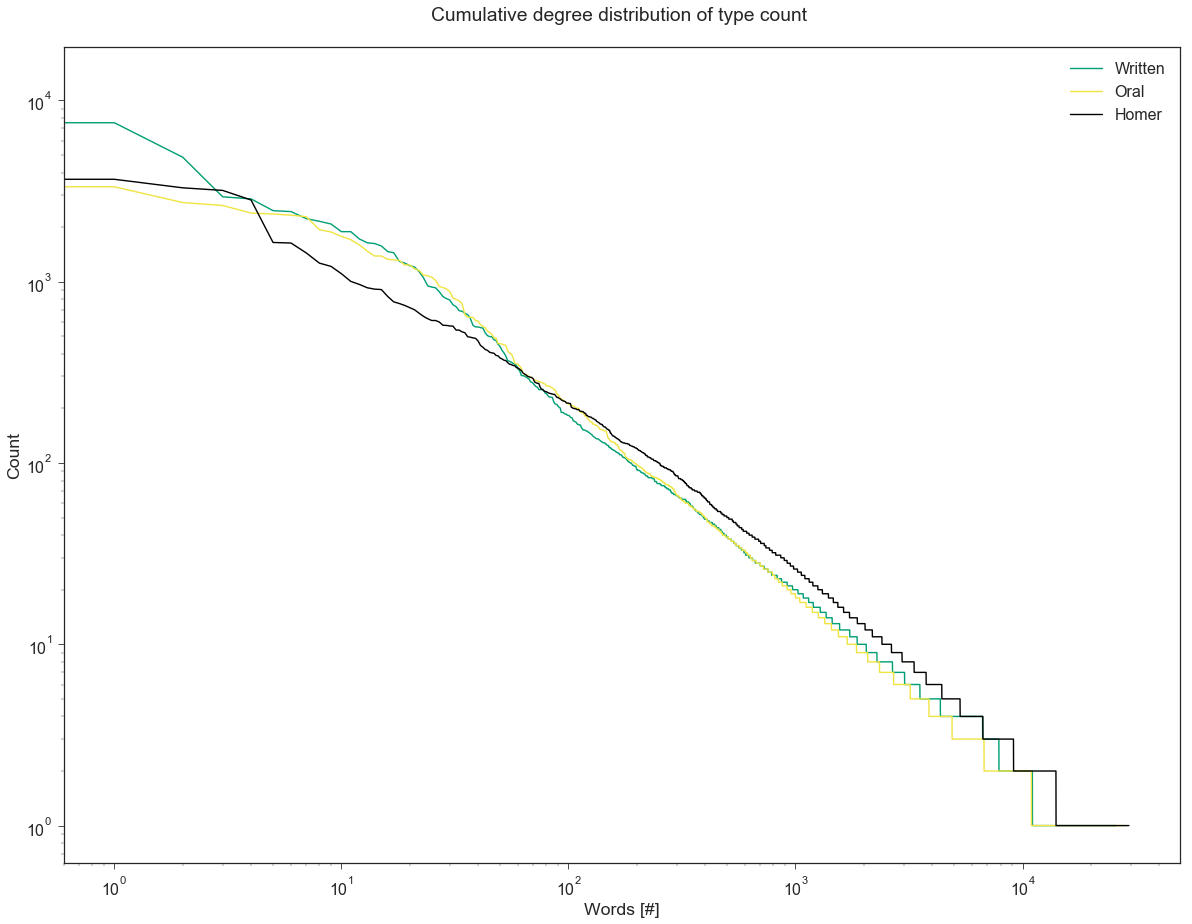

In [483]:
df_ = df_written['count'].sort_values(ascending = False).reset_index()['count']
plt.loglog(df_.index, df_.values, label='Written', color = '#009E73')

plt.xlabel('Words [#]')
plt.ylabel('Count')
plt.title('Cumulative degree distribution of type count \n')

df_ = df_oral['count'].sort_values(ascending = False).reset_index()['count']
plt.loglog(df_.index, df_.values, label='Oral', color = '#F0E442')

df_ = df_Homer['count'].sort_values(ascending = False).reset_index()['count']
plt.loglog(df_.index, df_.values, label='Homer', color = '#000000')

plt.legend();

In [484]:
len(df_Homer)

29418

In [485]:
len(df_oral)

28345

In [486]:
len(df_written)

25705

In [487]:
df_Homer_oral = pd.merge(df_Homer, df_oral, on='word', how='inner')
len(df_Homer_oral)

3741

In [488]:
df_Homer_written = pd.merge(df_Homer, df_written, on='word', how='inner')
len(df_Homer_written)

4760

In [489]:
df_written_oral = pd.merge(df_written, df_oral, on='word', how='inner')
len(df_written_oral)

6467

In [520]:
df_Homer_total = pd.merge(df_Homer, df_total, on='word', how='inner')
len(df_Homer_total)

3842

In [595]:
df_raw = pd.merge(df_Homer_raw, df_Others_raw, on='word', how = 'inner')

In [597]:
len(df_raw)

7060

In [564]:
ratio = 0.525

In [565]:
df_Homer_oral['count_ratio'] = df_Homer_oral[
    'count_x'] / (df_Homer_oral['count_y'] * ratio)
df_Homer_oral['MSE_ratio'] = df_Homer_oral[
    'weighted_MSE_x'] / df_Homer_oral['weighted_MSE_y']

In [566]:
df_Homer_written['count_ratio'] = df_Homer_written[
    'count_x'] / (df_Homer_written['count_y'] * ratio)
df_Homer_written['MSE_ratio'] = df_Homer_written[
    'weighted_MSE_x'] / df_Homer_written['weighted_MSE_y']

In [567]:
df_Homer_total['count_ratio'] = df_Homer_total[
    'count_x'] / (df_Homer_total['count_y'] * ratio)
df_Homer_total['MSE_ratio'] = df_Homer_total[
    'weighted_MSE_x'] / df_Homer_total['weighted_MSE_y']

In [598]:
df_raw['count_ratio'] = df_raw[
    'count_x'] / (df_raw['count_y'] * ratio)
df_raw['MSE_ratio'] = df_raw[
    'weighted_MSE_x'] / df_raw['weighted_MSE_y']

In [608]:
df = df_raw.sort_values('MSE_ratio', ascending = False)

In [609]:
df = df[df['count_x'] > 10]
df = df[df['count_y'] > (10/ratio)]

In [610]:
len(df)

515

In [611]:
df

,word,count_x,length_x,weighted_MSE_x,weighted_MAE_x,std_x,count_y,length_y,weighted_MSE_y,weighted_MAE_y,std_y,count_ratio,MSE_ratio
56,ἠδὲ,314,3,2.842596,1.686,0.581708,28,3,0.000206,0.014359,0.000000,21.360544,13786.953176
121,θεοὶ,168,4,3.356224,1.832,0.653067,54,4,0.000767,0.027692,0.303389,5.925926,4376.557531
211,ἦλθε,100,4,0.810000,0.900,0.316593,31,4,0.000253,0.015897,0.000000,6.144393,3205.020812
1629,ἔτος,11,4,0.978121,0.989,0.315366,35,4,0.000322,0.017949,0.303389,0.598639,3036.167431
381,ἦρχε,56,4,0.891136,0.944,0.395429,34,4,0.000304,0.017436,0.000000,3.137255,2931.266990
199,πατὴρ,103,5,0.804609,0.897,0.396201,38,5,0.000380,0.019487,0.403795,5.162907,2118.785126
67,ἔνθα,275,4,0.525625,0.725,0.468375,34,4,0.000304,0.017436,0.000000,15.406162,1728.969777
27,ἐνὶ,541,3,0.210681,0.459,1.211940,22,3,0.000127,0.011282,0.000000,46.839827,1655.195253
18,μιν,644,3,0.414736,0.644,0.898888,36,3,0.000341,0.018462,0.000000,34.074074,1216.846944
935,ἅπαντες,22,7,0.956484,0.978,0.342789,59,7,0.000915,0.030256,0.000000,0.710250,1044.823444


In [603]:
df.to_excel('count_ratio_2.xlsx')

In [613]:
df_Homer_raw.sort_values('std', ascending = False)

,word,count,length,weighted_MSE,weighted_MAE,std
4,δ᾽,2823,2,10.093329,3.177,2.369936
1,καὶ,4803,3,0.038809,0.197,1.890555
5,τε,2649,2,5.527201,2.351,1.644761
3,δὲ,3188,2,1.411344,1.188,1.632696
9,οἱ,1129,2,8.242641,2.871,1.476524
6,μὲν,1634,3,1.865956,1.366,1.311350
29,ἐνὶ,541,3,0.210681,0.459,1.211940
490,Ποσειδάων,51,9,0.002601,0.051,1.104536
25,ἐς,574,2,0.329476,0.574,1.096358
166,ἔγχος,129,5,0.016641,0.129,1.077033
